In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Festive_sales.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df['Amount']=df['Amount'].astype(int)

In [13]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory data analysis

#### gender analysis(women shop more and also have more purchasing power)

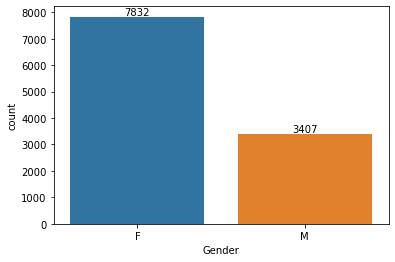

In [14]:
chart=sns.countplot(x='Gender',data=df)
for bars in chart.containers:
    chart.bar_label(bars)

In [18]:
sale_power=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

<AxesSubplot:xlabel='Gender', ylabel='Amount'>

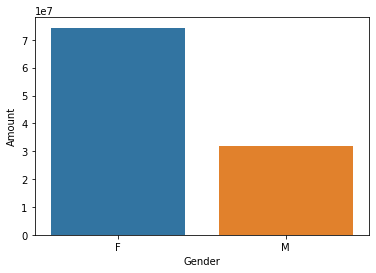

In [19]:
sns.barplot(x='Gender',y='Amount',data=sale_power)

#### Age analysis(most buyers are female in the age of 26-35)

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

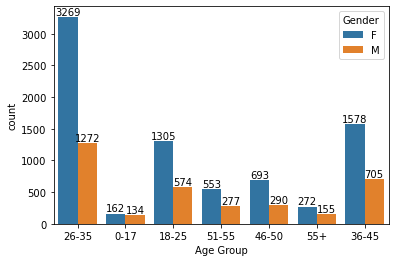

In [22]:
age_chart=sns.countplot(x='Age Group',hue='Gender',data=df)

for bars in age_chart.containers:
    age_chart.bar_label(bars)
    

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

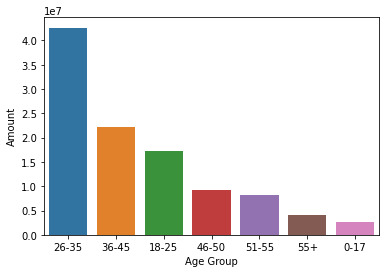

In [24]:
age_power=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=age_power)

#### state analysis (most orders are from uttar pradesh)

<AxesSubplot:xlabel='State', ylabel='Orders'>

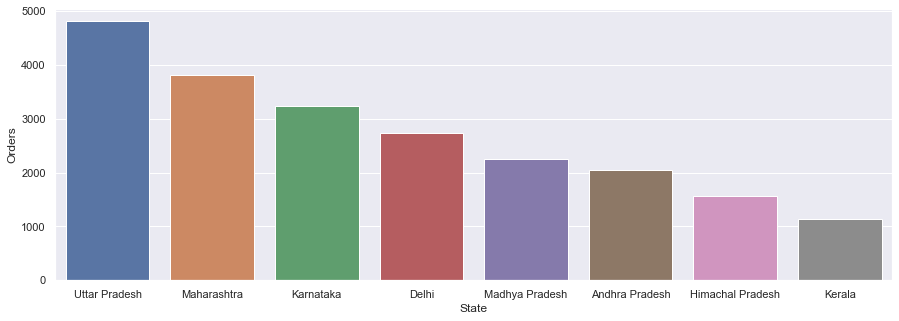

In [31]:
state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Orders',data=state)

<AxesSubplot:xlabel='State', ylabel='Amount'>

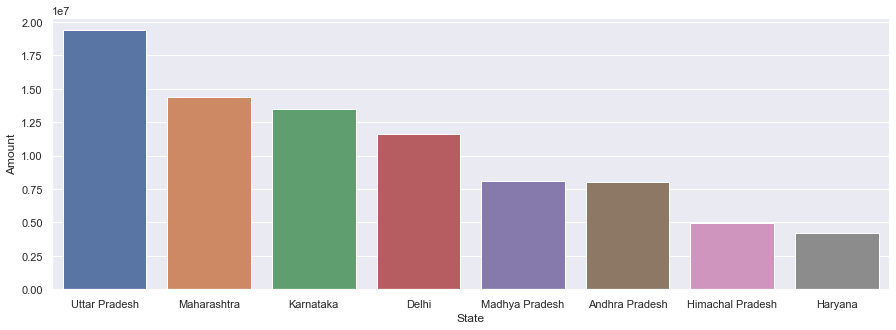

In [32]:
state_sale=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x='State',y='Amount',data=state_sale)

#### Marital status (married women have more purchasing power)

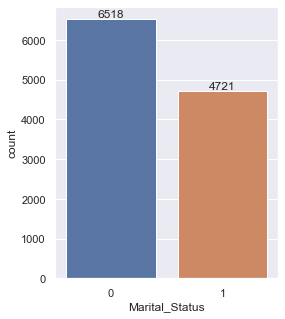

In [36]:
marital=sns.countplot(x='Marital_Status',data=df)
sns.set(rc={'figure.figsize':(4,5)})

for bars in marital.containers:
    marital.bar_label(bars)

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

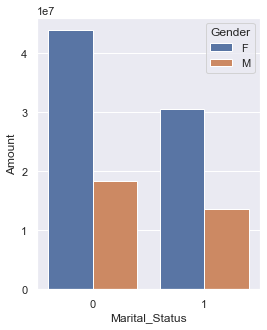

In [39]:
mstatus_sale=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=mstatus_sale)


#### Occupation analysis (most buyers work in IT Sector )

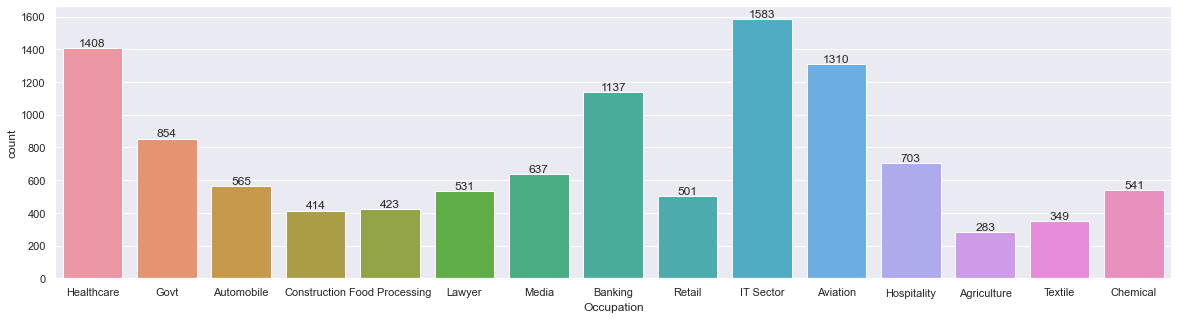

In [43]:
sns.set(rc={'figure.figsize':(20,5)})

occ=sns.countplot(x='Occupation', data=df)
for bars in occ.containers:
    occ.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

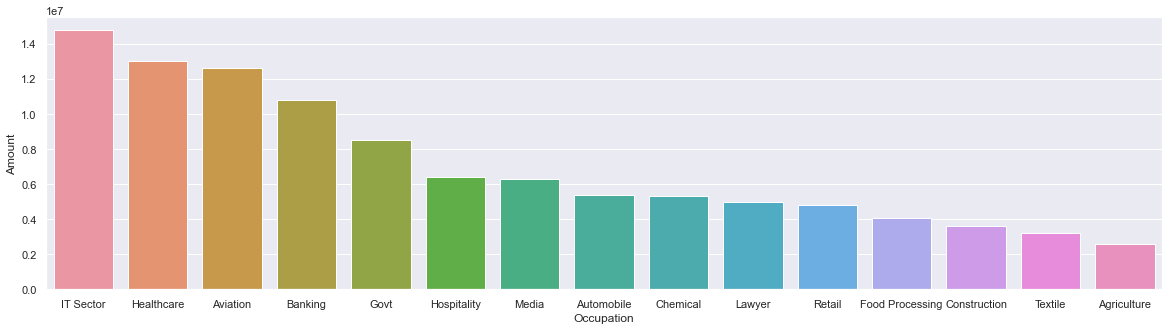

In [45]:
occ_sale=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Occupation',y='Amount',data=occ_sale)

#### product category analysis

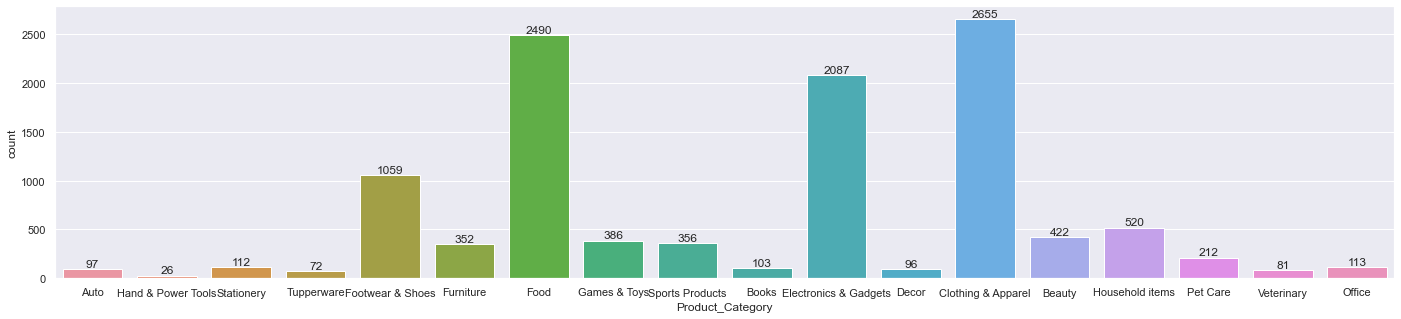

In [50]:
sns.set(rc={'figure.figsize':(24,5)})

category=sns.countplot(x='Product_Category', data=df)
for bars in category.containers:
    category.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

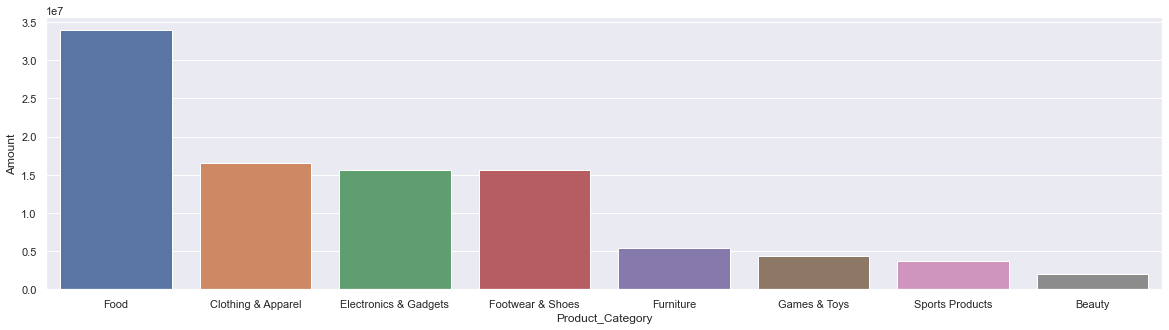

In [48]:
prod_sale=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(8)

sns.barplot(x='Product_Category',y='Amount',data=prod_sale)

# CONCLUSION: 
Most buyers are female in the age group of 26-35 years from up, maharashtra, karnataka working in sector. They mostly order food and clothes.